In [1]:
import numpy as np
print("Yokoso, watashi no Knapsack Projecto...")

Yokoso, watashi no Knapsack Projecto...


In [121]:
class Item():
    profit = 0
    weight = 0
    def __init__(self, profit, weight):
        self.weight = weight
        self.profit = profit
    def setProfit(self,p):
        self.profit=p
    def setWeight(self,w):
        self.weight = w
    def show_item(self):
        print("Profit: ",self.profit," Weight: ",self.weight)

class Knapsack():
    capacity = 0
    nbItems = 0
    items = []
    def setNbItems(self,nb):
        self.nbItems = nb
    def setCapacity(self,cap):
        self.capacity = cap
    def addItem(self,profit, weight):
        self.items.append(Item(profit,weight))  
    


In [122]:

# Read the data
def read_data(filename):
    f = open(filename, "r")
    lines = f.readlines()
    knapsack = Knapsack()
    nbItemLine = lines[3].strip().split()
    knapsack.setNbItems(int(nbItemLine[1]))
    capacityLine = lines[4].strip().split()
    knapsack.setCapacity(int(capacityLine[1]))
    data = lines[7:]
    for line in data:
        values = line.strip().split()
        knapsack.addItem(int(values[1]), int(values[2]))
    f.close()
    return knapsack

knapsack = read_data("Data/pi-12-100-1000-001.kna")
        
for elem in knapsack.items:
        elem.show_item()

print("Nb Items: ", knapsack.nbItems)
print("Capacity: ", knapsack.capacity)



Profit:  582  Weight:  582
Profit:  194  Weight:  194
Profit:  679  Weight:  679
Profit:  485  Weight:  485
Profit:  312  Weight:  396
Profit:  873  Weight:  873
Profit:  468  Weight:  594
Profit:  208  Weight:  264
Profit:  364  Weight:  462
Profit:  260  Weight:  330
Profit:  582  Weight:  582
Profit:  388  Weight:  388
Profit:  291  Weight:  291
Profit:  104  Weight:  132
Profit:  520  Weight:  660
Profit:  416  Weight:  528
Profit:  970  Weight:  970
Profit:  260  Weight:  330
Profit:  582  Weight:  582
Profit:  364  Weight:  462
Profit:  776  Weight:  776
Profit:  194  Weight:  194
Profit:  468  Weight:  594
Profit:  970  Weight:  970
Profit:  312  Weight:  396
Profit:  260  Weight:  330
Profit:  156  Weight:  198
Profit:  485  Weight:  485
Profit:  416  Weight:  528
Profit:  364  Weight:  462
Profit:  582  Weight:  582
Profit:  388  Weight:  388
Profit:  468  Weight:  594
Profit:  679  Weight:  679
Profit:  52  Weight:  66
Profit:  156  Weight:  198
Profit:  312  Weight:  396
Pro

In [9]:
## Algorithmes génétiques
SAD = Knapsack()
SAD.nbItems = 100
proba_0 = 0.5 # Probabilité de génération de zero
n = (int) (SAD.nbItems/20)
Nsol = []
for i in range(n):
    sol = np.random.choice([0, 1], size=SAD.nbItems, p=[proba_0, 1-proba_0]) #génération aléatoire de solutions
    Nsol.append(sol)
print(Nsol)

[array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]), array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]), array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
import random
def knapsack_value(knapsack, solution):
    total_weight = sum(item.weight * s for item, s in zip(knapsack.items, solution))
    total_value = sum(item.profit * s for item, s in zip(knapsack.items, solution))
    return (total_value,total_weight)  if total_weight <= knapsack.capacity else (0,0)

def find_best_neighboor(solution,value,weight,knapsack,tabuList):
    best_solution ,move,max_value = solution,0,0 
    for i in range(len(solution)-1):
        if i not in tabuList:
            neighbor = solution[:]
            neighbor[i] = 1 - neighbor[i]
            neighborValue = value + knapsack.items[i].profit if neighbor[i] == 1 else value - knapsack.items[i].profit
            neighborWeight = weight + knapsack.items[i].weight if neighbor[i] == 1 else weight - knapsack.items[i].weight
            if neighborWeight <= knapsack.capacity:
                if neighborValue>max_value:
                    best_solution = neighbor
                    move = i
                    max_value = neighborValue
    return (best_solution,move,max_value)

def tabu_search(knapsack, max_iterations, tabu_size):
    best_solution = [0] *knapsack.nbItems  # Meilleure solution trouvée
    best_solution_value, bestSolutionWeight = knapsack_value(knapsack, best_solution)
    tabu_list = []  # Liste taboue stockant les indices des bits modifiés

    current_solution = [0] * knapsack.nbItems

    solutionsList=[]
    
    for _ in range(max_iterations):

        bestVoisin, move,value = find_best_neighboor(current_solution,best_solution_value,bestSolutionWeight,knapsack,tabu_list)
        

        delta_f = value - best_solution_value

        current_solution = bestVoisin
        # Ajouter à la liste taboue si la solution ne s'améliore pas
        if delta_f <= 0:
            tabu_list.append(move)
            if len(tabu_list) > tabu_size:
                tabu_list.pop(0)

        # Mise à jour de la meilleure solution
        if value > best_solution_value:
            best_solution = bestVoisin[:]
            best_solution_value,bestSolutionWeight = knapsack_value(knapsack, bestVoisin)

        solutionsList.append(best_solution_value)

    return best_solution, best_solution_value, bestSolutionWeight,solutionsList


In [169]:
import matplotlib.pyplot as plt
knapsack1 = read_data("Data/pi-12-10000-1000-001.kna")
knapsack2 = read_data("Data/pi-13-10000-1000-001.kna")
knapsack3 = read_data("Data/pi-15-10000-1000-001.kna")

max_iterations = 50
tabu_size = 20

best_solution, best_value, weight,solutionsList1 = tabu_search(knapsack3, max_iterations, tabu_size)
# best_solution, best_value, weight,solutionsList2 = tabu_search(knapsack2, max_iterations, tabu_size)
# best_solution, best_value, weight,solutionsList3 = tabu_search(knapsack3, max_iterations, tabu_size)
print("Best solution:", best_solution)
print("Best value:", best_value)
print("weight:", weight)

# plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="Knapsack pi-12")
# plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="Knapsack pi-13")
# plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="Knapsack pi-15")
# plt.xlabel("Nombre d'itérations")
# plt.ylabel("solution optimale")
# plt.title("Évolution du profit du sac à dos avec la recherche tabou")
# plt.legend()
# plt.grid()
# plt.show()


Best solution: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Best solution : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

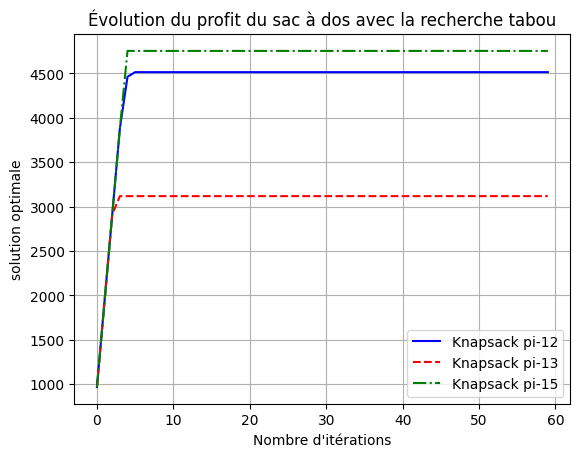

In [ ]:
knapsack1 = read_data("Data/pi-12-1000-1000-001.kna")
knapsack2 = read_data("Data/pi-13-1000-1000-001.kna")
knapsack3 = read_data("Data/pi-15-1000-1000-001.kna")

max_iterations = 60
tabu_size = 25

best_solution, best_value12, weight1,solutionsList1 = tabu_search(knapsack1, max_iterations, tabu_size)
best_solution, best_value13, weight2,solutionsList2 = tabu_search(knapsack2, max_iterations, tabu_size)
best_solution, best_value15, weight3,solutionsList3 = tabu_search(knapsack3, max_iterations, tabu_size)
print("Best solution :", best_solution)
print("Best value pi-12:", best_value12)
print("weight1:", weight1)

print("Best value pi-13:", best_value13)
print("weight2:", weight2)

print("Best value pi-15:", best_value15)
print("weight3:", weight3)


plt.plot(range(len(solutionsList1)), solutionsList1, linestyle='-', color='b', label="Knapsack pi-12")
plt.plot(range(len(solutionsList2)), solutionsList2, linestyle='--', color='r', label="Knapsack pi-13")
plt.plot(range(len(solutionsList3)), solutionsList3, linestyle='-.', color='g', label="Knapsack pi-15")
plt.xlabel("Nombre d'itérations")
plt.ylabel("solution optimale")
plt.title("Évolution du profit du sac à dos avec la recherche tabou")
plt.legend()
plt.grid()
plt.show()

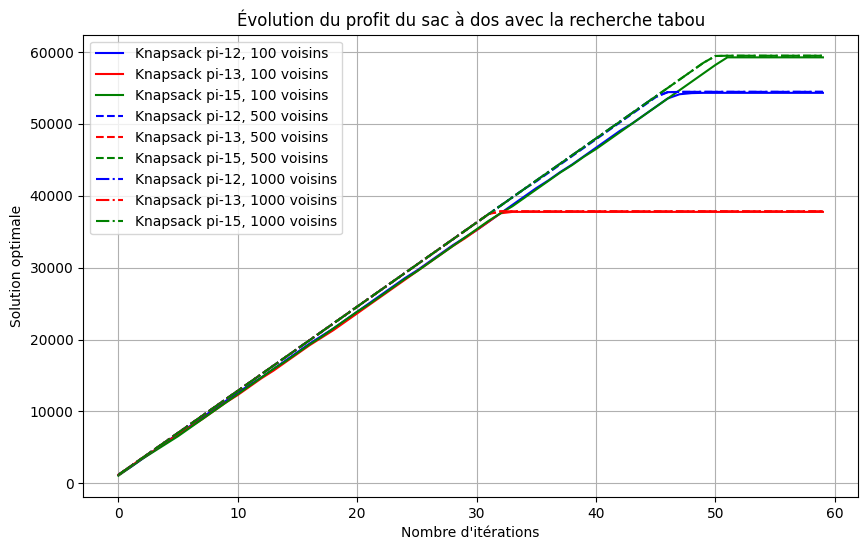

In [ ]:
knapsack1 = read_data("Data/pi-12-10000-1000-001.kna")
knapsack2 = read_data("Data/pi-13-10000-1000-001.kna")
knapsack3 = read_data("Data/pi-15-10000-1000-001.kna")

max_iterations = 60
tabu_size = 25

# Définir les nombres de voisins à tester
nbVoisins_list = [100, 500, 1000]

# Stocker les résultats pour chaque nombre de voisins
results = []

for nbVoisins in nbVoisins_list:
    best_solution, best_value12, weight1, solutionsList1 = tabu_search(knapsack1, max_iterations, tabu_size)
    best_solution, best_value13, weight2, solutionsList2 = tabu_search(knapsack2, max_iterations, tabu_size)
    best_solution, best_value15, weight3, solutionsList3 = tabu_search(knapsack3, max_iterations, tabu_size)
    results.append((solutionsList1, solutionsList2, solutionsList3, nbVoisins))

# Tracer le graphe 2D
plt.figure(figsize=(10, 6))

# Couleurs et styles de ligne pour chaque nombre de voisins
colors = ['b', 'r', 'g']
linestyles = ['-', '--', '-.']

# Ajouter les données au graphe 2D
for idx, (solutionsList1, solutionsList2, solutionsList3, nbVoisins) in enumerate(results):
    iterations = range(max_iterations)

    # Tracer pour chaque knapsack
    plt.plot(iterations, solutionsList1, linestyle=linestyles[idx], color=colors[0], label=f"Knapsack pi-12, {nbVoisins} voisins")
    plt.plot(iterations, solutionsList2, linestyle=linestyles[idx], color=colors[1], label=f"Knapsack pi-13, {nbVoisins} voisins")
    plt.plot(iterations, solutionsList3, linestyle=linestyles[idx], color=colors[2], label=f"Knapsack pi-15, {nbVoisins} voisins")

# Configurer les axes et le titre
plt.xlabel("Nombre d'itérations")
plt.ylabel("Solution optimale")
plt.title("Évolution du profit du sac à dos avec la recherche tabou")
plt.legend()
plt.grid()
plt.show()